<a href="https://colab.research.google.com/github/mrdbourke/m1-machine-learning-test/blob/main/03_results_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results comparison for M1, M1 Pro, M1 Max Machine Learning Speed Tests

The code in this notebook compares the results for various experiments run on Apple's M1, M1 Pro and M1 Max laptops.

As well as other various devices such as Google Colab (K80 GPU) and a Nvidia Titan RTX GPU.

You can see all of the code the experiments on GitHub: https://github.com/mrdbourke/m1-machine-learning-test

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download results

The following code will download the results folder from GitHub as a file of CSV's (if they don't already exist in the current directory).

In [2]:
import os
if not os.path.exists("results"):
  "'results' folder not found, downloading from GitHub."
  !git clone https://github.com/mrdbourke/m1-machine-learning-test.git
  !mv m1-machine-learning-test/results .
  results_path = "results"
else:
  "'results' folder exists, aborting the clone..."
  results_path = "results"

Cloning into 'm1-machine-learning-test'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 143 (delta 91), reused 80 (delta 38), pack-reused 0
Receiving objects: 100% (143/143), 254.42 KiB | 6.06 MiB/s, done.
Resolving deltas: 100% (91/91), done.


## Import results to DataFrame

In [3]:
import pathlib

results_list = pathlib.Path(results_path).glob("*.csv")
results_df_list = []

for result in results_list:
  df = pd.read_csv(result, header=0)
  results_df_list.append(df)

results_df = (pd.concat(results_df_list, 
                       axis=0, 
                       ignore_index=True)
              .drop("Unnamed: 0", axis=1)
              .sort_values("model", ascending=False))

results_df

,device,dataset_name,epochs,batch_size,num_train_samples,num_test_samples,total_train_time,time_per_epoch,model
0,Apple M1 Max,cifar10,10.0,32.0,50016,10016,143.287,14.329,TinyVGG
11,AMD Radeon Pro 5500M 8 GB (Intel Mac),cifar10,10.0,32.0,50016,10016,179.712,17.971,TinyVGG
2,TITAN RTX GPU,cifar10,10.0,32.0,50016,10016,37.092,3.709,TinyVGG
3,Google Colab (K80 GPU),cifar10,10.0,32.0,50016,10016,166.911,16.691,TinyVGG
4,Apple M1 Pro,cifar10,10.0,32.0,50016,10016,161.169,16.117,TinyVGG
13,Apple M1,cifar10,10.0,32.0,50016,10016,137.266,13.727,TinyVGG
5,Apple M1,california_housing,NaN,NaN,16512,4128,24.099,NaN,RandomForestCV
15,Google Colab,california_housing,NaN,NaN,16512,4128,163.964,NaN,RandomForestCV
7,Intel_Mac,california_housing,NaN,NaN,16512,4128,20.424,NaN,RandomForestCV
14,Apple M1 Pro,california_housing,NaN,NaN,16512,4128,20.383,NaN,RandomForestCV


## Create helper function to plot results

In [24]:
def plot_results(results, x_col_name, y_col_name, title, xlabel, ylabel):
  plt.figure(figsize=(10, 7))
  plt.bar(results[x_col_name], results[y_col_name])
  plt.title(title, fontsize=18)
  plt.xlabel(xlabel, fontsize=14)
  plt.xticks(rotation=45, ha="right")
  plt.ylabel(ylabel, fontsize=14);

## CIFAR10 with TinyVGG

Results from notebook code - https://github.com/mrdbourke/m1-machine-learning-test/blob/main/00_cifar10_tinyvgg_benchmark.ipynb

In [25]:
tinyvgg_results = results_df[results_df["model"] == "TinyVGG"][["device", "time_per_epoch"]].sort_values("time_per_epoch")
tinyvgg_results

,device,time_per_epoch
2,TITAN RTX GPU,3.709
13,Apple M1,13.727
0,Apple M1 Max,14.329
4,Apple M1 Pro,16.117
3,Google Colab (K80 GPU),16.691
11,AMD Radeon Pro 5500M 8 GB (Intel Mac),17.971


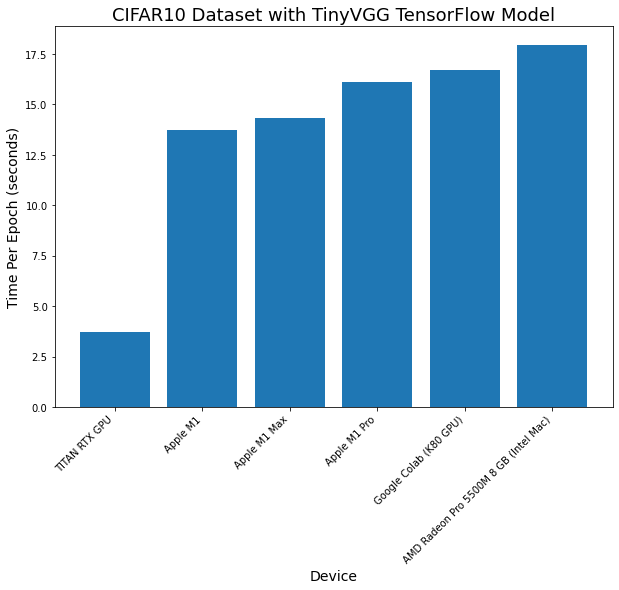

In [26]:
plot_results(results=tinyvgg_results,
             x_col_name="device",
             y_col_name="time_per_epoch",
             title="CIFAR10 Dataset with TinyVGG TensorFlow Model",
             xlabel="Device",
             ylabel="Time Per Epoch (seconds)")

## EfficientNetB0 feature extractor with Food101

Results from notebook code - https://github.com/mrdbourke/m1-machine-learning-test/blob/main/01_food101_effnet_benchmark.ipynb

In [28]:
effnetb0_results = results_df[results_df["model"] == "EfficientNetB0_feature_extract"][["device", "time_per_epoch"]].sort_values("time_per_epoch")
effnetb0_results

,device,time_per_epoch
8,TITAN RTX GPU,92.751
9,Apple M1 Max,191.790
10,Apple M1 Pro,297.199
16,Google Colab (K80 GPU),424.428
6,AMD Radeon Pro 5500M 8 GB (Intel Mac),606.492
1,Apple M1,677.478


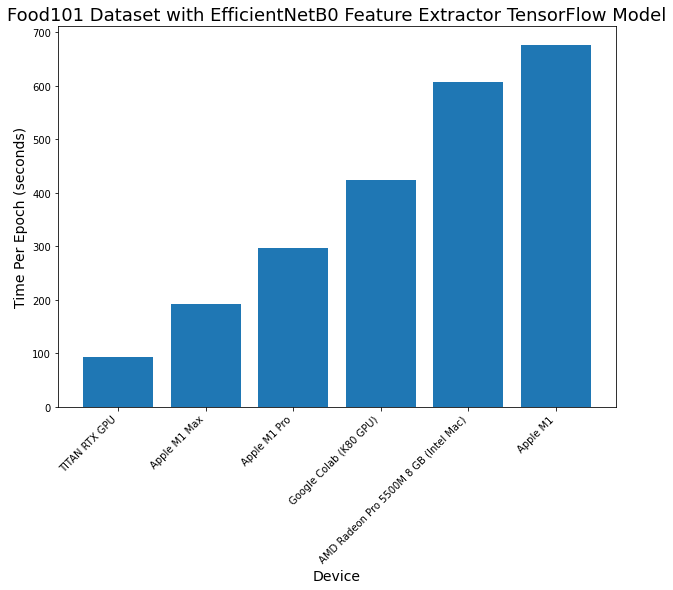

In [29]:
plot_results(results=effnetb0_results,
             x_col_name="device",
             y_col_name="time_per_epoch",
             title="Food101 Dataset with EfficientNetB0 Feature Extractor TensorFlow Model",
             xlabel="Device",
             ylabel="Time Per Epoch (seconds)")

## RandomForestClassifier Cross-validation with California Housing Dataset

Results from notebook code - https://github.com/mrdbourke/m1-machine-learning-test/blob/main/02_random_forest_benchmark.ipynb 

In [11]:
random_forest_results = results_df[results_df["model"] == "RandomForestCV"][["device", "total_train_time"]].sort_values("total_train_time")
random_forest_results

,device,total_train_time
12,Apple M1 Max,16.244
14,Apple M1 Pro,20.383
7,Intel_Mac,20.424
5,Apple M1,24.099
15,Google Colab,163.964


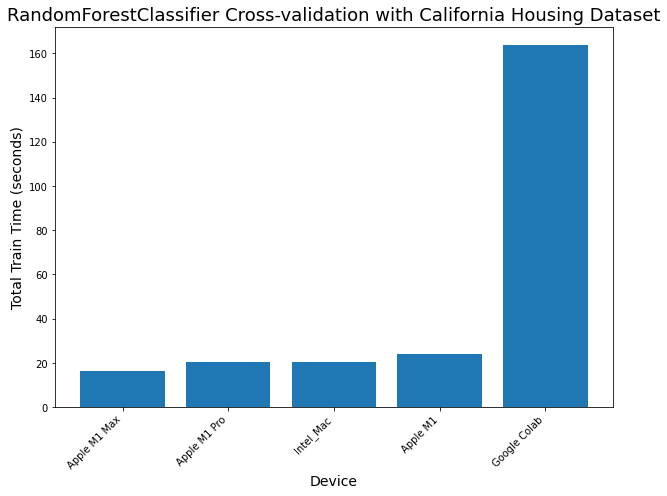

In [30]:
plot_results(results=random_forest_results,
             x_col_name="device",
             y_col_name="total_train_time",
             title="RandomForestClassifier Cross-validation with California Housing Dataset",
             xlabel="Device",
             ylabel="Total Train Time (seconds)")